## Workshop SEMEB - Unesp Tupã

Nome: **Guilherme de Cleva Farto**<br>
E-Mail: **guilherme.farto@gmail.com**<br>

Data: **Sábado, 10 de Outubro de 2020**

---

## Red Wine Quality - Kaggle Dataset
### Simple and clean practice dataset for regression or classification modelling

Fonte: Kaggle [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

<img src='wine.gif' width='320'></img>

---

## Considerações iniciais e contextualização

#### Objetivos do projeto de pesquisa

- Realizar carregamento e exploração inicial de dados;
- Adotar técnicas e estratégias de pré-processamento, verificação e/ou limpeza de dados (ainda que não necessário, este projeto também demonstra tais recursos para efeitos de aplicação futura);
- Implementar e avaliar algoritmos/estratégias de Classificação e Regressão;
- Experimentar recursos para visualização de dados a partir de [Matplotlib](https://matplotlib.org/) e [Seaborn](https://seaborn.pydata.org/);

#### Contextualização

Esta pesquisa foi conduzida com base no desafio disponibilizado na plataforma Kaggle: [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

Os atributos contidos neste dataset possuem a estrutura de dados apresentada na seção "Estrutura de dados".

#### Estrutura de dados

- **fixed acidity**: most acids involved with wine or fixed or nonvolatile;
- **volatile acidity**: the amount of acetic acid in wine;
- **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines;
- **residual sugar**: the amount of sugar remaining after fermentation stops;
- **chlorides**: the amount of salt in the wine;
- **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion;
- **total sulfur dioxide**: amount of free and bound forms of S02;
- **density**: the density of water is close to that of water depending on the percent alcohol and sugar content;
- **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic);
- **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels;


- **alcohol**: the percent alcohol content of the wine;
> Atributo utilizado no contexto de Regressão, neste projeto de pesquisa;
- **quality**: output variable (based on sensory data, score between 0 and 10);
> Atributo utilizado no contexto de Classificação, neste projeto de pesquisa;

---

In [1]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

import joblib

import matplotlib.pyplot as plt
import matplotlib.style as style

import numpy as np

import pandas as pd

import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['figure.dpi'] = 100

In [3]:
# palette = sns.color_palette("tab10")
# sns.set_palette(palette)
# 
# sns.palplot(palette, size=0.4)

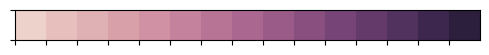

In [4]:
palette = sns.cubehelix_palette(15)
sns.set_palette(palette)

sns.palplot(palette, size=0.4)

In [5]:
style.use('seaborn-poster')
style.use('ggplot')

sns.set(font_scale=1.0)

In [6]:
# Pandas
wine = pd.read_csv('winequality-red.csv')

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
2,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
3,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0


In [8]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,NaN,0.56,9.4,5.0
6,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
7,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
8,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
9,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0


In [9]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1600,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1601,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1602,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1603,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1604,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


In [10]:
wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1595,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5.0
1596,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6.0
1597,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1599,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1600,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1601,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1602,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1603,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1604,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


In [11]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [13]:
sorted(list(wine.columns))

['alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity']

In [14]:
wine.shape

(1605, 12)

In [15]:
print(wine.shape[0])
print(wine.shape[1])

1605
12


In [16]:
print(f'Linhas....: {wine.shape[0]}')
print(f'Colunas...: {wine.shape[1]}')

Linhas....: 1605
Colunas...: 12


In [17]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1605 non-null   float64
 1   volatile acidity      1605 non-null   float64
 2   citric acid           1605 non-null   float64
 3   residual sugar        1605 non-null   float64
 4   chlorides             1605 non-null   float64
 5   free sulfur dioxide   1605 non-null   float64
 6   total sulfur dioxide  1605 non-null   float64
 7   density               1605 non-null   float64
 8   pH                    1604 non-null   float64
 9   sulphates             1605 non-null   float64
 10  alcohol               1602 non-null   float64
 11  quality               1603 non-null   float64
dtypes: float64(12)
memory usage: 150.6 KB


In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1604.000000,1605.000000,1602.000000,1603.000000
mean,8.316199,0.528464,0.269963,2.536417,0.087424,15.856698,46.421184,0.996751,3.311733,0.657782,10.421067,5.634435
std,1.738743,0.179033,0.195139,1.407829,0.046982,10.444815,32.842562,0.001885,0.154544,0.169296,1.065587,0.807185
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
wine[['alcohol']].describe()

,alcohol
count,1602.000000
mean,10.421067
std,1.065587
min,8.400000
25%,9.500000
50%,10.200000
75%,11.100000
max,14.900000


In [21]:
wine[['alcohol', 'quality']].describe()

,alcohol,quality
count,1602.000000,1603.000000
mean,10.421067,5.634435
std,1.065587,0.807185
min,8.400000,3.000000
25%,9.500000,5.000000
50%,10.200000,6.000000
75%,11.100000,6.000000
max,14.900000,8.000000


In [22]:
wine[['alcohol', 'quality']].describe().loc[['count', 'mean', 'min', 'max']]

,alcohol,quality
count,1602.000000,1603.000000
mean,10.421067,5.634435
min,8.400000,3.000000
max,14.900000,8.000000


In [23]:
wine[['alcohol', 'quality']].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.0])

,alcohol,quality
count,1602.000000,1603.000000
mean,10.421067,5.634435
std,1.065587,0.807185
min,8.400000,3.000000
10%,9.300000,5.000000
25%,9.500000,5.000000
50%,10.200000,6.000000
75%,11.100000,6.000000
80%,11.300000,6.000000
90%,12.000000,7.000000


In [24]:
wine.sort_values(by=['quality'], ascending=[True])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
905,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3.0
696,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3.0
838,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3.0
1380,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3.0
1484,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8.0
1067,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8.0
1126,7.9,0.540,0.34,2.50,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8.0
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,NaN


In [25]:
wine.sort_values(by=['quality', 'alcohol'], ascending=[False, True])[['pH', 'quality']]

,pH,quality
446,2.88,8.0
1409,3.23,8.0
501,3.15,8.0
504,3.15,8.0
1455,3.23,8.0
...,...,...
696,3.63,3.0
1305,3.50,3.0
905,3.48,3.0
0,3.51,NaN


In [26]:
wine.value_counts(subset=['quality']).sort_index().to_frame().rename(columns={0: 'count'}).reset_index()

,quality,count
0,3.0,10
1,4.0,53
2,5.0,685
3,6.0,638
4,7.0,199
5,8.0,18


In [27]:
wine.value_counts(subset=['quality']).sort_index().to_frame().rename(columns={0: 'count'})

,count
quality,
3.0,10
4.0,53
5.0,685
6.0,638
7.0,199
8.0,18


In [28]:
wine.value_counts(subset=['quality']).sort_values().to_frame().rename(columns={0: 'count'})

,count
quality,
3.0,10
8.0,18
4.0,53
7.0,199
6.0,638
5.0,685


In [29]:
wine.groupby(by=['quality']).agg({'quality': ['count', 'mean', 'min', 'max']})

quality               
          count mean  min  max
quality                       
3.0          10  3.0  3.0  3.0
4.0          53  4.0  4.0  4.0
5.0         685  5.0  5.0  5.0
6.0         638  6.0  6.0  6.0
7.0         199  7.0  7.0  7.0
8.0          18  8.0  8.0  8.0

In [30]:
wine.groupby(by=['quality']).agg({'alcohol': ['count', 'mean', 'min', 'max']})

alcohol                      
          count       mean  min   max
quality                              
3.0          10   9.955000  8.4  11.0
4.0          53  10.265094  9.0  13.1
5.0         682   9.898974  8.5  14.9
6.0         638  10.629519  8.4  14.0
7.0         199  11.465913  9.2  14.0
8.0          18  12.094444  9.8  14.0

In [31]:
wine.groupby(by=['quality']).agg({'alcohol': ['count', 'mean', 'min', 'max'], 'pH': ['count', 'mean', 'min', 'max']})

alcohol                          pH                      
          count       mean  min   max count      mean   min   max
quality                                                          
3.0          10   9.955000  8.4  11.0    10  3.398000  3.16  3.63
4.0          53  10.265094  9.0  13.1    53  3.381509  2.74  3.90
5.0         682   9.898974  8.5  14.9   684  3.305848  2.88  3.74
6.0         638  10.629519  8.4  14.0   638  3.318072  2.86  4.01
7.0         199  11.465913  9.2  14.0   199  3.290754  2.92  3.78
8.0          18  12.094444  9.8  14.0    18  3.267222  2.88  3.72

In [32]:
def unique_count(series):
    return len(np.unique(series))

def delta(series):
    return np.max(series)-np.min(series)

def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = '{:2.0f}%'.format(n*100)
    return percentile_

wine.groupby(by=['quality']).agg({'alcohol': [unique_count, 'count', 'mean', 'min', 'max', delta, percentile(0.25), percentile(0.5), percentile(0.95)]})

alcohol                                                          
        unique_count count       mean  min   max delta     25%     50%     95%
quality                                                                       
3.0             10.0    10   9.955000  8.4  11.0   2.6   9.725   9.925  10.955
4.0             25.0    53  10.265094  9.0  13.1   4.1   9.600  10.000  11.620
5.0             45.0   682   9.898974  8.5  14.9   6.4   9.400   9.700  11.295
6.0             56.0   638  10.629519  8.4  14.0   5.6   9.800  10.500  12.500
7.0             42.0   199  11.465913  9.2  14.0   4.8  10.800  11.500  12.900
8.0             15.0    18  12.094444  9.8  14.0   4.2  11.325  12.150  14.000

##### Resultados da análise exploratória sobre qualidade (notas dos vinhos) por teor alcóolico

Conforme análise realizada, percebe-se que vinhos com nota igual a 8.0 possuem teor alcóolico superior a 11...

---

In [33]:
wine.shape

(1605, 12)

In [34]:
wine_na = wine.isna().sum()
wine_na

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 3
quality                 2
dtype: int64

In [35]:
wine[(wine['alcohol'] >= 7) & (wine['quality'] >= 8)][['alcohol', 'quality']]

,alcohol,quality
273,12.8,8.0
284,12.6,8.0
396,12.9,8.0
446,9.8,8.0
461,13.4,8.0
487,11.7,8.0
501,11.0,8.0
504,11.0,8.0
594,14.0,8.0
834,12.7,8.0


In [36]:
wine_na[wine_na > 0]

pH         1
alcohol    3
quality    2
dtype: int64

In [37]:
wine_na[wine_na > 0].sort_values()

pH         1
quality    2
alcohol    3
dtype: int64

In [38]:
wine_na[wine_na > 0].sort_values(ascending=False)

alcohol    3
quality    2
pH         1
dtype: int64

In [39]:
wine_na[wine_na > 0].sort_index()

alcohol    3
pH         1
quality    2
dtype: int64

In [40]:
wine_na[wine_na > 0].sort_index(ascending=False)

quality    2
pH         1
alcohol    3
dtype: int64

##### Análise sobre dados faltantes

Percebe-se que as colunas (_features_) definidas como `quality`, `pH` e `alcohol` possuem valores faltantes, respectivamente, 2, 1 e 3.

In [41]:
wine_na = wine.isnull().any()
wine_na

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates               False
alcohol                  True
quality                  True
dtype: bool

In [42]:
list(wine.columns[wine_na])

['pH', 'alcohol', 'quality']

In [43]:
wine_na = wine.isnull().any(axis=1)
wine_na

0        True
1        True
2        True
3        True
4        True
        ...  
1600    False
1601    False
1602    False
1603    False
1604    False
Length: 1605, dtype: bool

In [44]:
wine[wine_na]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
2,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
3,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,NaN,0.56,9.4,5.0


In [45]:
wine[wine[['alcohol']].isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
3,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5.0


In [46]:
# wine.loc[[wine[['alcohol', 'quality']].isnull().any(axis=1), 'alcohol'] = 0

In [47]:
wine.shape

(1605, 12)

In [48]:
wine.dropna(subset=['alcohol'], inplace=True)

In [49]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 2
dtype: int64

In [50]:
wine.shape

(1602, 12)

In [51]:
wine[wine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,NaN,0.56,9.4,5.0


In [52]:
wine.dropna(inplace=True)

In [53]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
wine.shape

(1599, 12)

In [55]:
wine[['alcohol', 'quality']].describe()

,alcohol,quality
count,1599.000000,1599.000000
mean,10.422983,5.636023
std,1.065668,0.807569
min,8.400000,3.000000
25%,9.500000,5.000000
50%,10.200000,6.000000
75%,11.100000,6.000000
max,14.900000,8.000000


In [56]:
wine.shape

(1599, 12)

In [57]:
wine.duplicated()

6       False
7       False
8       False
9       False
10       True
        ...  
1600    False
1601    False
1602     True
1603    False
1604    False
Length: 1599, dtype: bool

In [58]:
wine[wine.duplicated(subset=['pH', 'sulphates', 'alcohol', 'quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
17,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0
33,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0
46,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1570,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1573,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1587,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0


In [59]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
17,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0
33,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0
46,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0
71,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1570,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1573,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1587,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0


In [60]:
# wine.drop_duplicates(keep='first', inplace=True)

In [61]:
wine.shape

(1599, 12)

In [62]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
17,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0
33,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0
46,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0
71,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1570,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1573,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1587,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0


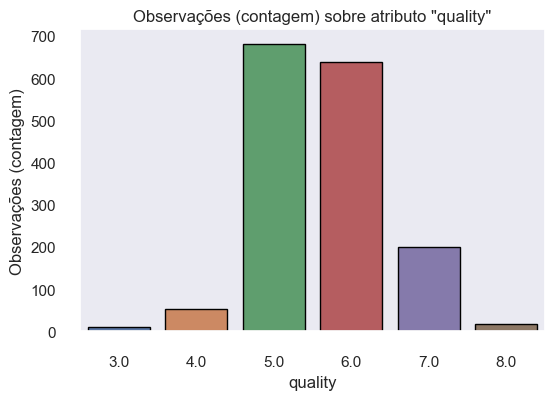

In [63]:
# matplotlib, seaborn, plotly

plt.figure(figsize=(6,4))

ax = sns.countplot(x='quality', data=wine, edgecolor='black')

ax.set_title('Observações (contagem) sobre atributo "quality"')

ax.set_yticks(np.arange(0, 800, 100))
ax.set_ylabel('Observações (contagem)')

ax.grid(False)

In [64]:
WINE_QUALITY_CUT = 6.5

GOOD_WINE = 1
BAD_WINE  = 0

In [65]:
wine['quality']

6       5.0
7       5.0
8       5.0
9       6.0
10      5.0
       ... 
1600    5.0
1601    6.0
1602    6.0
1603    5.0
1604    6.0
Name: quality, Length: 1599, dtype: float64

In [66]:
wine['quality'].apply(lambda x: GOOD_WINE if x >= WINE_QUALITY_CUT else BAD_WINE).value_counts().sort_index().to_frame()

,quality
0,1382
1,217


In [67]:
wine['quality'] = wine['quality'].apply(lambda x: GOOD_WINE if x >= WINE_QUALITY_CUT else BAD_WINE)

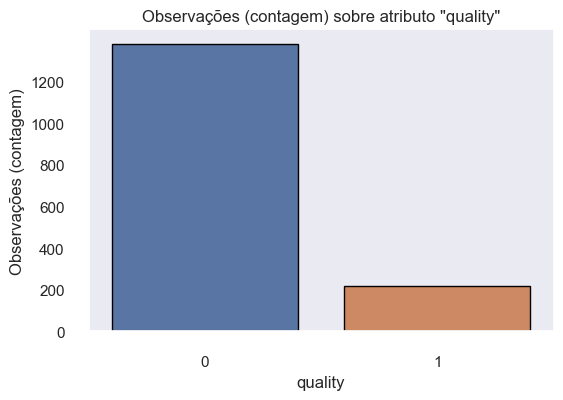

In [68]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='quality', data=wine, edgecolor='black')

ax.set_title('Observações (contagem) sobre atributo "quality"')

ax.set_yticks(np.arange(0, 1400, 200))
ax.set_ylabel('Observações (contagem)')

ax.grid(False)

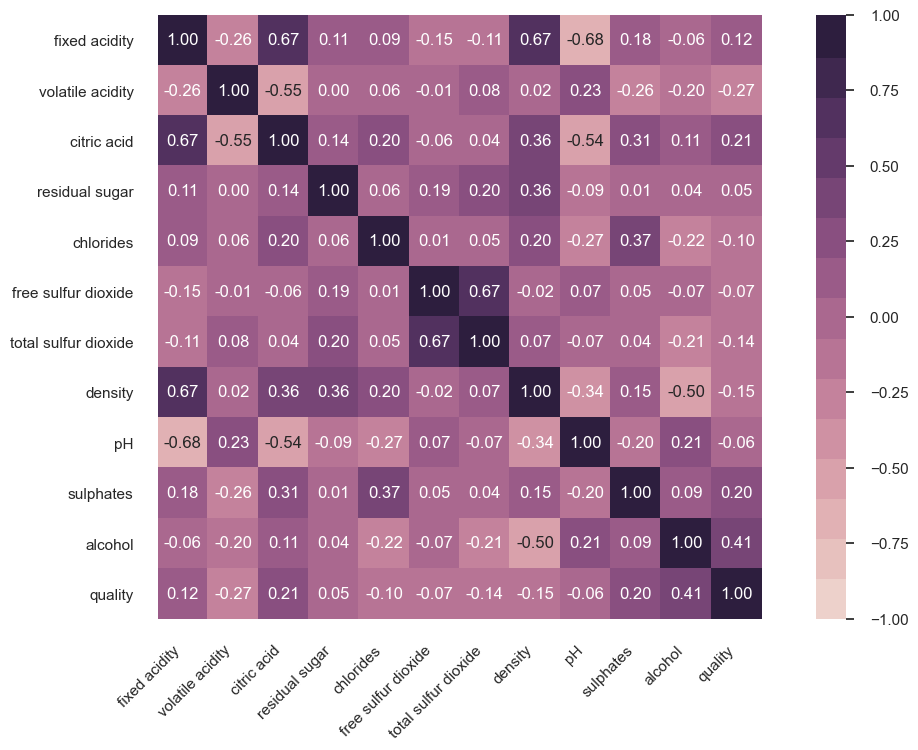

In [69]:
plt.figure(figsize=(14,8))

corr = wine.corr()

# corr = corr[corr.abs()>=.3]

with sns.axes_style('white'):
    ax = sns.heatmap(corr, vmin=-1.0, vmax=1.0, center=0, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', cmap=palette, cbar=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

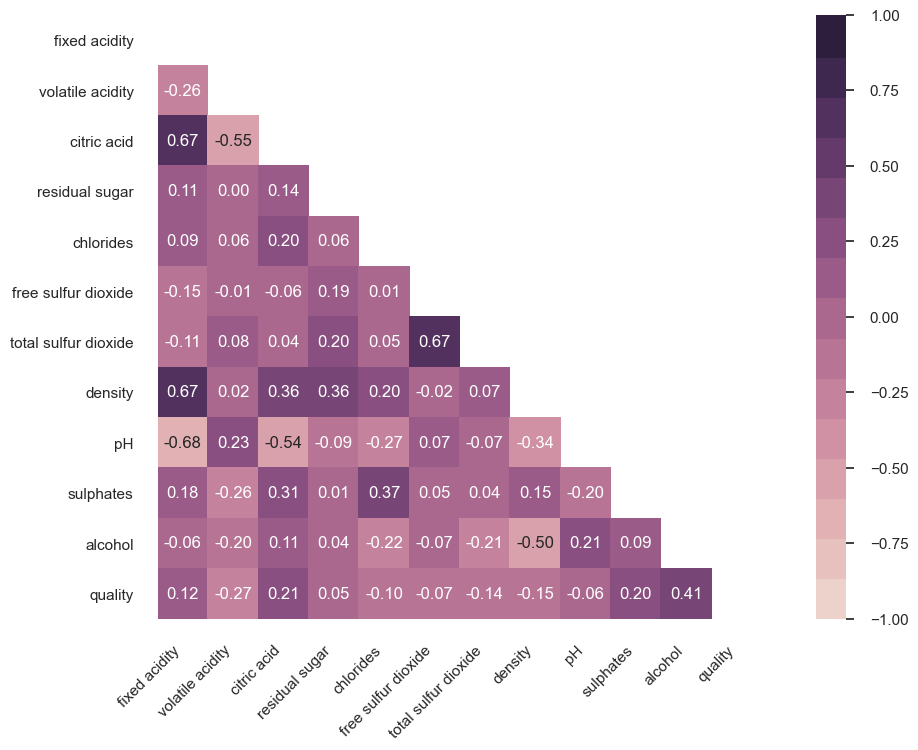

In [70]:
plt.figure(figsize=(14,8))

corr = wine.corr()

# corr = corr[corr.abs()>=.3]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(corr, mask=mask, vmin=-1.0, vmax=1.0, center=0, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', cmap=palette, cbar=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [71]:
corr[['quality', 'alcohol']].sort_values(by=['alcohol'])

,quality,alcohol
density,-0.150460,-0.496180
chlorides,-0.097308,-0.221141
total sulfur dioxide,-0.139517,-0.205654
volatile acidity,-0.270712,-0.202288
free sulfur dioxide,-0.071747,-0.069408
fixed acidity,0.120061,-0.061668
residual sugar,0.047779,0.042075
sulphates,0.199485,0.093595
citric acid,0.214716,0.109903
pH,-0.057283,0.205633


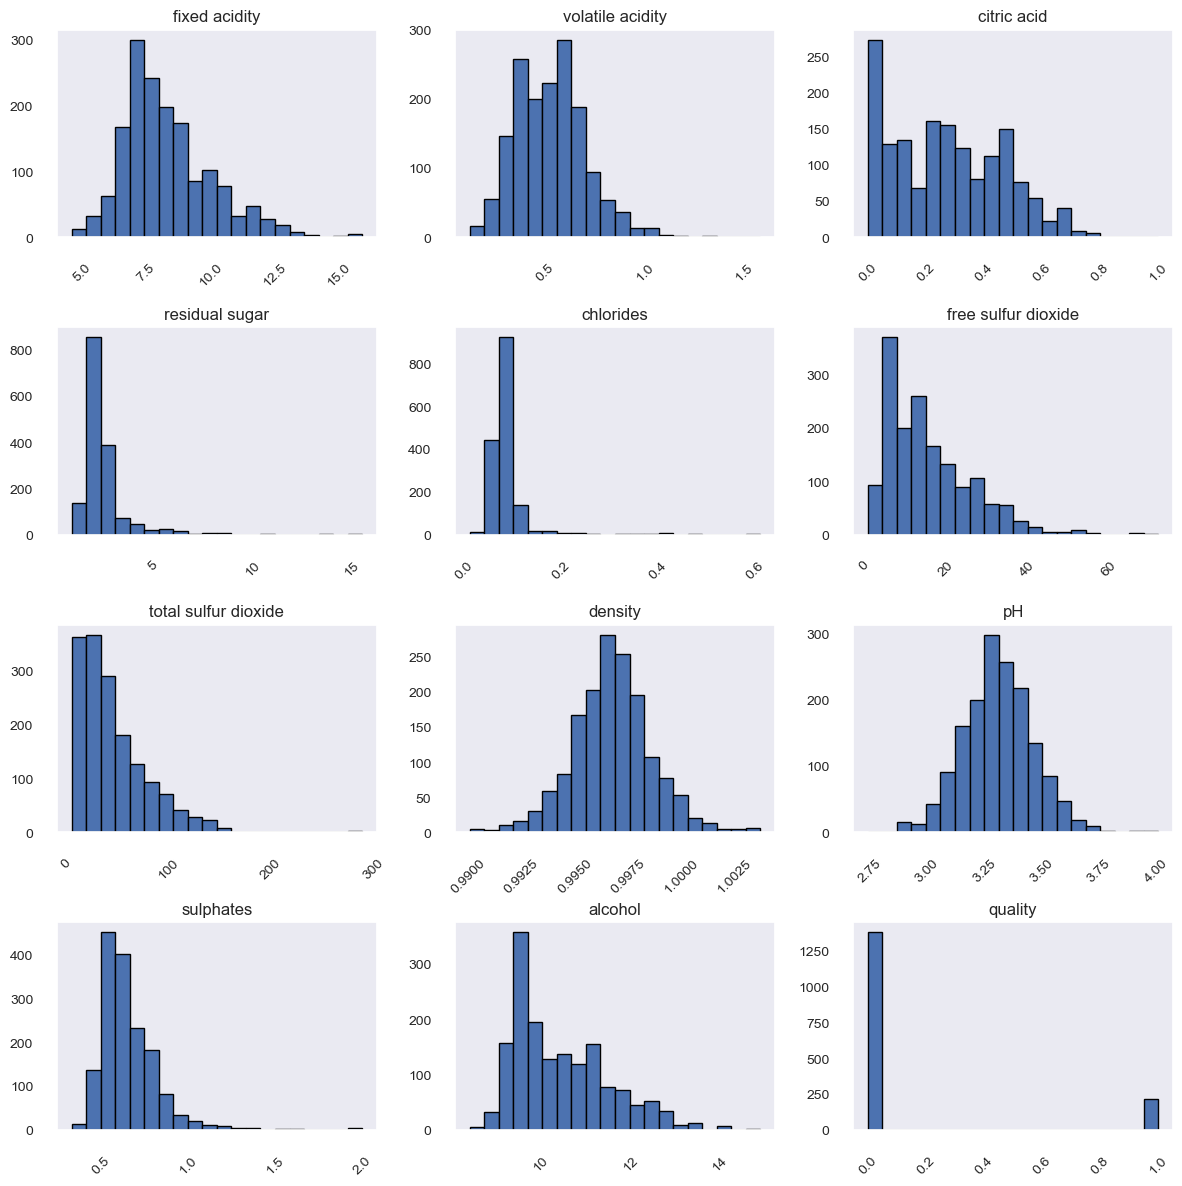

In [72]:
fig = wine.hist(bins=20, edgecolor='black', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(6,6), grid=False)

plt.tight_layout(rect=(0, 0, 2.0, 2.0))

In [73]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
7,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
8,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
9,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
10,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1600,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1601,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1602,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1603,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [74]:
def get_features_and_target(df, target_name):
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    features_names = X.columns
    
    return (X, y, features_names)

In [75]:
X, y, features_names = get_features_and_target(wine, 'quality')

In [76]:
def metrics_result(y_pred, y_test, precision_average='weighted'):
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred, average=precision_average)
    # recall, f1score
    
    return (accuracy, precision)

In [77]:
X, y, features_names = get_features_and_target(wine, 'quality')

In [78]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
7,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
8,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
9,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
10,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1600,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1601,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1602,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1603,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [79]:
y

6       0
7       0
8       0
9       0
10      0
       ..
1600    0
1601    0
1602    0
1603    0
1604    0
Name: quality, Length: 1599, dtype: int64

In [80]:
features_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [81]:
TEST_SET_PROPORTION = 0.2

In [82]:
# Hiperparâmetros
# PCA - redução de dimensionalidade

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SET_PROPORTION, stratify=y, random_state=42)

# Padronização dos dados (Z-Score Normalization)
# média igual a 0 (zero) e desvio padrão igual a 1 (um)
scaler = StandardScaler()

# Normalização dos dados (MinMax Scaling)
# intervalo de mínimo e máximo, e.g., 0 (min) e 1 (max)
# scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f'X shape....: {X.shape}')
print(f'y shape....: {y.shape}')
print(f'y unique...: {y.unique()}')
print()

print(f'x_train shape...: {x_train.shape}')
print(f'y_train shape...: {y_train.shape}')
print()
print(f'x_test shape....: {x_test.shape}')
print(f'y_test shape....: {y_test.shape}')

X shape....: (1599, 11)
y shape....: (1599,)
y unique...: [0 1]

x_train shape...: (1279, 11)
y_train shape...: (1279,)

x_test shape....: (320, 11)
y_test shape....: (320,)


In [84]:
x_train

array([[ 1.07100074, -0.59949467,  1.53130838, ..., -1.77013426,
        -0.17977295, -0.78194777],
       [-0.1970216 , -1.94966075,  0.49744889, ..., -2.74878115,
        -1.31155079,  2.09526879],
       [-0.65812063,  0.44125834, -1.31180522, ...,  0.97007704,
        -0.7754455 ,  1.25994785],
       ...,
       [ 0.78281385, -0.59949467,  0.96268566, ..., -0.26954236,
         0.47546685,  1.72401504],
       [-1.11921966,  1.51013982, -1.41519117, ...,  1.16580642,
        -0.83501275,  1.07432098],
       [-1.58031869,  2.18522285, -1.41519117, ...,  2.40542581,
         0.4158996 ,  0.8886941 ]])

In [85]:
scaler.mean_, scaler.scale_

(array([ 8.34182955,  0.52656372,  0.27376857,  2.5336982 ,  0.08779515,
        15.83189992, 46.08678655,  0.99676559,  3.31131353,  0.66017983,
        10.44249414]),
 array([1.73498521e+00, 1.77755911e-01, 1.93449885e-01, 1.37438240e+00,
        4.74537784e-02, 1.05220777e+01, 3.17704687e+01, 1.89463295e-03,
        1.53272852e-01, 1.67877470e-01, 1.07743020e+00]))

### K-Nearest Neighbors

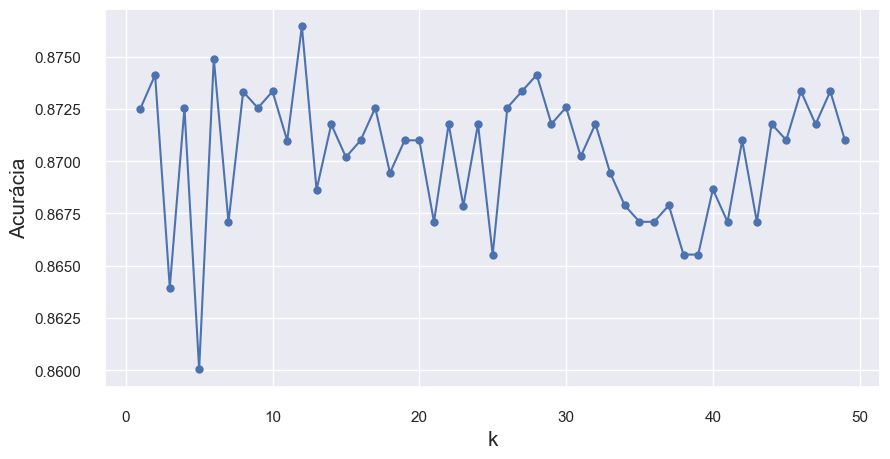

Melhor k: 12
Acurácia: 0.900 | Precisão: 0.890


In [86]:
nkf = 10
vk = []
vscore = []

for k in range(1, 50, 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.show(True)

best_k = np.argmax(vscore)+1

print('Melhor k:', best_k)

# ---

model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy, precision = metrics_result(y_pred, y_test)

print(f'Acurácia: {accuracy:.3f} | Precisão: {precision:.3f}')

### Decision Tree

In [87]:
model = DecisionTreeClassifier(criterion='gini', random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy, precision = metrics_result(y_pred, y_test)

print(f'Acurácia: {accuracy:.3f} | Precisão: {precision:.3f}')

Acurácia: 0.891 | Precisão: 0.899


### Random Forest

*** Melhor n: 22  com acurácia: 0.940625 ***


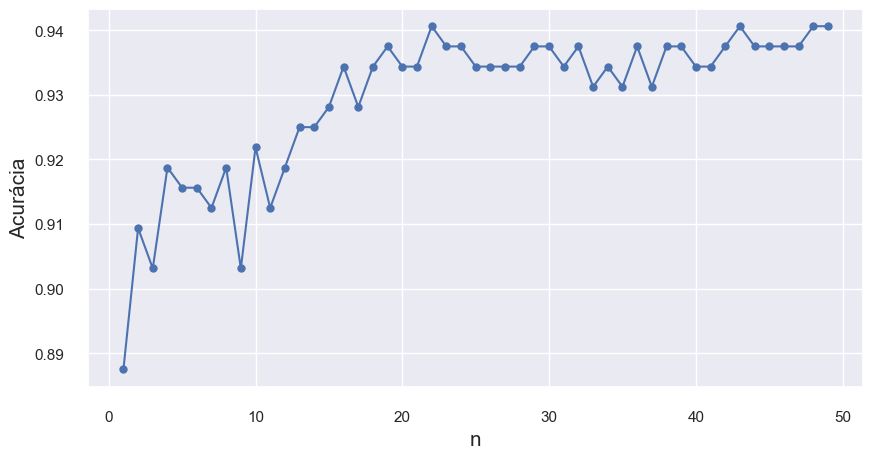

Acurácia: 0.941 | Precisão: 0.940


In [88]:
vscore = []
vn = []

for n in range(1, 50, 1):
    # model = RandomForestClassifier(n_estimators=n, bootstrap=True, class_weight=None, criterion='gini',
    #     max_depth=None, max_features='auto', max_leaf_nodes=None,
    #     min_impurity_decrease=0.0, min_impurity_split=None,
    #     min_samples_leaf=1, min_samples_split=2,
    #     min_weight_fraction_leaf=0.0, n_jobs=1,
    #     oob_score=False, random_state=101, verbose=0,
    #     warm_start=False)
    model = RandomForestClassifier(n_estimators=n, criterion='gini', random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    
    vscore.append(score)
    vn.append(n)

best_n = vn[np.argmax(vscore)]
print('*** Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)],'***')

plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('n', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.show()

# -----

# model = RandomForestClassifier(n_estimators=best_n, bootstrap=True, class_weight=None, criterion='gini',
#     max_depth=None, max_features='auto', max_leaf_nodes=None,
#     min_impurity_decrease=0.0, min_impurity_split=None,
#     min_samples_leaf=1, min_samples_split=2,
#     min_weight_fraction_leaf=0.0, n_jobs=1,
#     oob_score=False, random_state=101, verbose=0,
#     warm_start=False)
model = RandomForestClassifier(n_estimators=best_n, criterion='gini', random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy, precision = metrics_result(y_pred, y_test)

print(f'Acurácia: {accuracy:.3f} | Precisão: {precision:.3f}')

### Grid Search + Random Forest

In [89]:
parameters = { 'n_estimators': [10, 30, 50, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False] }

classifier = model = RandomForestClassifier(random_state=101)
model = GridSearchCV(classifier, param_grid=parameters, cv=10, scoring=['accuracy', 'precision'], refit='accuracy', n_jobs=-1)
model.fit(x_train, y_train)

print(f'Melhores parâmetros...: {model.best_params_}')
print(f'Melhor modelo.........: {model.best_estimator_}')
print(f'Melhor acurácia.......: {model.best_score_}')
print()

means = model.cv_results_['mean_test_accuracy']

for mean, params in sorted(zip(means, model.cv_results_['params']), key=lambda t: t[0], reverse=True):
    print('%0.3f para %r' % (mean, params))

Melhores parâmetros...: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 80}
Melhor modelo.........: RandomForestClassifier(n_estimators=80, random_state=101)
Melhor acurácia.......: 0.9030573326771654

0.903 para {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 80}
0.902 para {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 90}
0.901 para {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
0.901 para {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.901 para {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 90}
0.900 para {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 50}
0.900 para {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 80}
0.899 para {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
0.899 para {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 90}
0.898 para {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 80}
0.898 para {'bootstrap': False, 'criterion': 'gini

In [90]:
model = RandomForestClassifier(n_estimators=80, random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy, precision = metrics_result(y_pred, y_test)

print(f'Acurácia: {accuracy:.3f} | Precisão: {precision:.3f}')

Acurácia: 0.944 | Precisão: 0.942


---

In [91]:
joblib.dump(scaler, 'scaler.bin', compress=True)

['scaler.bin']

In [92]:
joblib.dump(model, 'model.bin', compress=True)

['model.bin']

---

##### pandas
##### scikit-learn
##### numpy + scipy + statsmodels
##### matplotlib + seaborn + plotly
##### Luigi + Apache Airflow (Data Science Pipeline)
##### DevOps + DevSecOps + DataOps

---

##### Automated Machine Learning (AutoML)
##### Crawler: Beautiful Soup + Selenium WebDriver
##### AutoScraper
##### NLP + Natural Language Toolkit (NLTK)

---

Guilherme de Cleva Farto

guilherme.farto@gmail.com

https://www.linkedin.com/in/guilherme-farto

https://github.com/guilhermefarto